**Bijectors:** Tensorflow Objects that implements bijective or invertible transformations. These objects form the basis for the Normalising Flow model.

- These objects have methods for forward and inverse transformations

In [1]:
import tensorflow as tf
import tensorflow_probability as tfp
import matplotlib.pyplot as plt

In [2]:
tfd = tfp.distributions
tfb = tfp.bijectors
tfpl = tfp.layers

In [3]:
z = tf.constant([1.,2.,3.])
z

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>

In [5]:
scale = tfb.Scale(2.) # Scaling bijector transformation with scaling factor 2

In [6]:
x = scale.forward(z) # Forward transformation
x.numpy()

array([2., 4., 6.], dtype=float32)

In [7]:
scale.inverse(z) # Inverse transformation

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.5, 1. , 1.5], dtype=float32)>

__Now lets add/chain another bijective transformation__

In [8]:
shift = tfb.Shift(1)


In [9]:
scale_and_shift = tfb.Chain([shift, scale]) # The operations are applied in the reverse order

In [10]:
scale_and_shift.forward(z)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([3., 5., 7.], dtype=float32)>

In [11]:
scale_and_shift.inverse(tf.constant([2.,5.,8.]))

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.5, 2. , 3.5], dtype=float32)>

__Another way of chaining__
bijector called on a bijector

In [12]:
scale_and_shift = shift(scale)
scale_and_shift.forward(z)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([3., 5., 7.], dtype=float32)>

__Another way of forward method__
bijector called on vector

In [13]:
scale_and_shift(z)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([3., 5., 7.], dtype=float32)>

Besides computing forward and inverse transformaions on an input vector, they can also transform random variables

## Tutorial

In [49]:
# Define base distribution
normal = tfd.Normal(loc=0.,scale=1.)

In [50]:
# sample form base distribution
n = 10000
z = normal.sample(n)


##### Scale and shift bijector

In [51]:
# Define scale and shift
scale = 4.5
shift = 7
scale_and_shift = tfb.Chain([tfb.Shift(shift), tfb.Scale(scale)])


In [52]:
# We can also use call methods
scale_transf = tfb.Scale(scale)
shift_transf = tfb.Shift(shift)
scale_and_shift = shift_transf(scale_transf)

In [53]:
# Apply the forward transformation
x = scale_and_shift.forward(z)


In [54]:
tf.norm(x - (scale*z +shift)) # Checking if the transformation is behaving expected (comparing chaining with indvidual operations aapplied sequentially)


<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

##### Plots

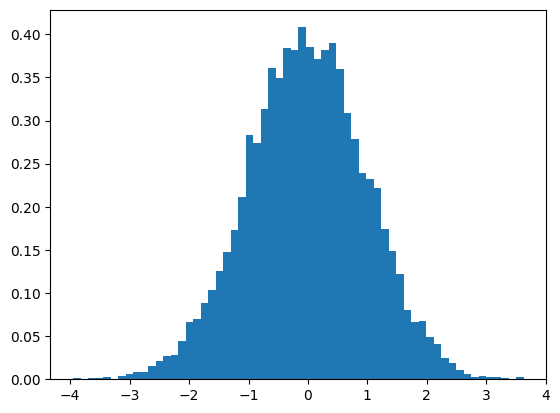

In [55]:
plt.hist(z, bins=60, density=True)
plt.show()

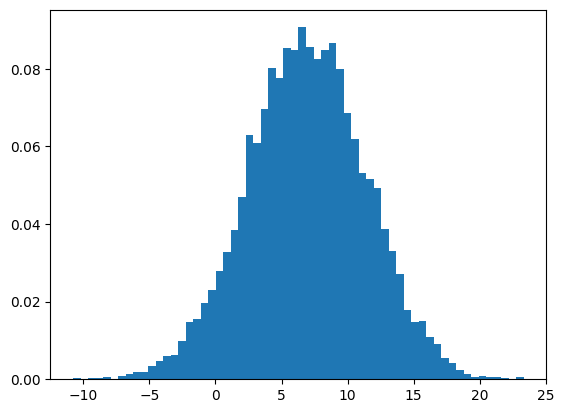

In [56]:
plt.hist(x, bins=60, density=True)
plt.show()

In [57]:
tf.math.reduce_variance(z).numpy()

0.9961041

In [63]:
tf.math.reduce_variance(x).numpy() # approx 4.5**2= 20.24 as expected

20.171108

In [64]:
tf.math.reduce_mean(z).numpy() # approx zero

-0.018115032

In [66]:
tf.math.reduce_mean(x).numpy() # approx seven as expected

6.918483

##### Inverse Transformation

In [70]:
# Apply inverse transformation
inv_x = scale_and_shift.inverse(x)

In [75]:
# check inverse transformation
tf.norm(inv_x - z).numpy() # We get zero, as expected, meaning theres no difference

0.0

##### Log probability




The forward method's function is $x=f(Z)$. So here, determinant of dx/dz is computed. Notice the jacobian is a function of Z here.

In [80]:
# Compute log prob for x
log_prob_x = normal.log_prob(z) - scale_and_shift.forward_log_det_jacobian(z,event_ndims=0)#event_dims is zero because of scalar event space
print(log_prob_x)

tf.Tensor([-3.0568657 -2.4700046 -2.9892144 ... -2.7589812 -3.6219845 -2.676297 ], shape=(10000,), dtype=float32)


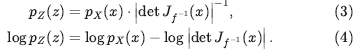
$$logpx(x) = logpz(z) + log|J_{f^{-1}}(x)|$$
The backward method's function is $z=f^{-1}(x)$.  So here, determinant of dz/dx is computed. Notice the jacobian is a function of X here.

In [85]:
# We can also use the inverse transformation. This formulation only contains x
log_prob_x = normal.log_prob(scale_and_shift.inverse(x)) + scale_and_shift.inverse_log_det_jacobian(x, event_dims=0)
print(log_prob_x)

tf.Tensor([-3.0568657 -2.4700046 -2.9892144 ... -2.7589812 -3.6219845 -2.676297 ], shape=(10000,), dtype=float32)


In [86]:
# Here, I just inserted 'z' insread of the f inverse of x for understanding. The above formulation is the preferred one
log_prob_x = normal.log_prob(z) + scale_and_shift.inverse_log_det_jacobian(x, event_dims=0)
print(log_prob_x)

tf.Tensor([-3.0568657 -2.4700046 -2.9892144 ... -2.7589812 -3.6219845 -2.676297 ], shape=(10000,), dtype=float32)


- All three above formulations have the same exact result

##### Broadcasting
broadcasting data/events accros multiple distributional parameters

In [87]:
x = tf.random.normal(shape=(100,1))


In [89]:
# Softfloor bijector
softfloor = tfb.Softfloor(temperature=0.01)
y = softfloor.forward(x)
print(y.shape)

(100, 1)


In [88]:
# Softfloor bijector using broadcasting
softfloor = tfb.Softfloor(temperature=[0.2,1.])
y = softfloor.forward(x)
print(y.shape)

(100, 2)


###### Checkout the lab on coursera for more

# Rest of the labs and tutorial will be done on coursera platform
#### This notebook will be used for extra practice, and notes.

## The TransformedDistribution class

In [92]:
normal = tfd.Normal(loc=0.,scale=1.)
z = normal.sample(3)
scale_and_shift = tfb.Chain([tfb.Shift(1.), tfb.Scale(2.)])
x = scale_and_shift.forward(z)
log_prob_z = normal.log_prob(z)
log_prob_x = (normal.log_prob(z) - scale_and_shift.forward_log_det_jacobian(z,events_ndims=0))
log_prob_x

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([-1.6182185, -2.2223687, -1.7049462], dtype=float32)>

In [93]:
# Equivalently
log_prob_x = (normal.log_prob(scale_and_shift.inverse(x)) + scale_and_shift.inverse_log_det_jacobian(x,events_ndims=0))
log_prob_x 

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([-1.6182185, -2.2223687, -1.7049462], dtype=float32)>

__Explanation:__
We are going to use the above formulation mostly, the reason being:\
Background:\
Base Dist: $ Z \sim P0$ This is a latent variable. The distribution is assumed to simple, such as diagonal Gaussian\
Transformation: $x = f(z)$\
Data dist: $x \sim P1$

- The function $f$ is bijective/invertible. This function is parameterized, and we will learn these parameters using MLE. During training, we'll have sample data points $x$. We'll then compute $\log{p(x)}$ under the model, where $x\sim P1$. 

- Additionally, since $P1$ is unknown, we will use the inverse of the transformation and the base distribution to get the probabilities.

That's what necessitates the formulation that comprises of $x$ exclusively.

After the parameters for the transformation are optimized, we can sample new data as:
- x_sample = bijector.forward(base_dist.sample())


#### Example 1

In [94]:
normal = tfd.Normal(loc=0.0, scale=1.) # base dist
z = normal.sample(3)
exp = tfb.Exp() # trnasformation
x = exp.forward(z)

x

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.29019737, 2.411094  , 4.3014393 ], dtype=float32)>

In [95]:
# To directly define the data dist P1, we use the TransformedDistribution
log_normal = tfd.TransformedDistribution(normal,exp) # base, transformation
log_normal

<tfp.distributions.TransformedDistribution 'expNormal' batch_shape=[] event_shape=[] dtype=float32>

- TransformedDistribution has batch_shape and event_shape similar tobase dist

In [96]:
# Short to create Transformed Dist
log_normal = exp(normal)
log_normal

<tfp.distributions.TransformedDistribution 'expNormal' batch_shape=[] event_shape=[] dtype=float32>

In [100]:
# Using the dist
print(log_normal.sample()) # samples from the base distribution, then transforms it using the bijector 
print(log_normal.log_prob(x)) # Applies the inverse det jacoboan formula to get prob

tf.Tensor(0.71489584, shape=(), dtype=float32)
tf.Tensor([-0.44706905 -2.18629    -3.4421554 ], shape=(3,), dtype=float32)


Calling bijector has three ways. Calling bijector on:
- Bijector, chains them and returns the chain object
- Event/data/sample tensor, returns the transformed value by application of bijector
- Distribution object, return TransformedDistribution Object

__Optional key-word arguments:__
The follwowing arguments can be used to override the batxh and event shape when these shapes are empty in the base dist.
- event_shape
- batch_shape

#### Example 2
Objective: HOw key-word arguments affects thetransformed dist, when the base dist has empty shapes

In [101]:
normal = tfd.Normal(loc=0.0, scale=1.) # base dist
normal

<tfp.distributions.Normal 'Normal' batch_shape=[] event_shape=[] dtype=float32>

In [102]:
scale_tril =[
    [1.,0],
    [1.,1.]
]
scale = tfb.ScaleMatvecTriL(scale_tril=scale_tril)
mvn = tfd.TransformedDistribution(normal,scale, event_shape=[2])

mvn

TypeError: __init__() got an unexpected keyword argument 'event_shape'

__The above error is due to the tensorflow version__
The course uses 2.1

In [103]:
tfd.MultivariateNormalDiag(loc=0., scale_diag=[[1., 2.], [1., 2.]]) 

<tfp.distributions.MultivariateNormalDiag 'MultivariateNormalDiag' batch_shape=[2] event_shape=[2] dtype=float32>

The above code creates two multivariate dists.
Both are exactly the same in this case. The first has variance matrix [[1,0],[0,2]]. The second has the same matrix as well. loc is broadcasted accross the two scale parameters.

## Subclassing bijectors

In [106]:
class MySigmoid(tfb.Bijector):
    def __init__(self, validate_args=False,name="sigmoid"):
        super(MySigmoid, self).__init__(
            validate_args=validate_args, forward_min_event_ndims=0,name=name
        )
    def _forward(self,x):
        return tf.math.sigmoid(x)

    def _inverse(self,y):
        return tf.math.log(y) - tf.math.log(1-y)

    def _inverse_log_det_jacobian(self, y): # implement assuming the input has the minimum input dimension
        return -tf.math.log(y) - tf.math.log(1-y)
        
    def _forward_log_det_jacobian(self,x):
        return -tf.math.softplus(-x)-tf.math.softplus(x)


## Autoregressive flows
- Why invertible transformations of distributions?
- - It allows us to compute the likelihood of the data under the model, which in turn means that we can train the model using the principle of maximum likelihood.
 
Nomalising flows reguires the computation log of the jacobian determinant, which is computationally expensive. A model with many layers with high dimensional transformations makes such computations impractical. This reuires careful architectural choices (refer to the course reading 'Autoregressive Flows and realNVP').

- Autoregressive flows is one such architectue that will be discussed here.
- The Jacobian determinant is easy to compute because theJacobian Matrix is lower triangular dut to autoregressive property.
- 

In [4]:
made = tfb.AutoregressiveNetwork(
    params=2, event_shape=[3], hidden_units=[16,16], activation='sigmoid'
)

In [6]:
made(tf.random.normal([2,3])) # two parameters for each feature. This input has two events with Dimensionality 3 (3 features). Reade the MADE paper for details

<tf.Tensor: shape=(2, 3, 2), dtype=float32, numpy=
array([[[ 0.        ,  0.        ],
        [-0.01005176, -0.08439602],
        [ 0.48749873, -0.01630397]],

       [[ 0.        ,  0.        ],
        [ 0.0086675 , -0.06167998],
        [ 0.5395398 , -0.00180623]]], dtype=float32)>

In [7]:
maf_bijector = tfb.MaskedAutoregressiveFlow(shift_and_log_scale_fn=)

SyntaxError: invalid syntax (1812399566.py, line 1)

### There's more code to this section, but I have left it due to time constraints